# **Fraud Detection**

**Business Objective**
Identify fraudulent transaction alerts from card transactions to reduce their fraud loss and increase their revenue; Improving fraud experience is essential to gain customer trust, integrity in financial systems and increase revenue

**Data**

The data comes from Vesta's real-world e-commerce transactions and contains a wide range of features from device type to product features. You also have the opportunity to create new features to improve your results.


**Technical objective**

Conduct initial data exploration, understand nuances of fraud data, perform feature engineering and prepare the data for modelling


# **Data Sources**

The data comes from Vesta's real-world e-commerce transactions and contains a wide range of features from device type to product features
The data is broken into two files identity and transaction, which are joined by TransactionID. Not all transactions have corresponding identity information.

https://www.kaggle.com/competitions/ieee-fraud-detection/data






In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score, f1_score, ConfusionMatrixDisplay, average_precision_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

#EDA (Non-linear feature analysis)
from sklearn.feature_selection import mutual_info_classif, r_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import partial_dependence

import warnings

In [30]:
df_1=pd.read_csv('drive/MyDrive/data/train_identity.csv',delimiter=',')

In [31]:
df_1.head(10)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,...,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,...,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [32]:
df_2=pd.read_csv('drive/MyDrive/data/train_transaction.csv',delimiter=',')

In [33]:
df_2.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
print(df_1.shape)
print(df_2.shape)

(144233, 41)
(590540, 394)


# **Understanding the data**


* Run summary stats on dataset

* Understand dataset for missing values; Quantify the size of missing data to determine if they should be dropped/imputed
* Determine categorical dimensions that could be used: Nominal /Ordinal

In [4]:
#Source: https://github.com/toby-gardner-ai/uc-berkeley-aiml-course/blob/main/notebooks/Mod4_Data_Analytics.ipynb
def summary_stats(df) -> pd.DataFrame:

    # Create base frame
    stats = pd.DataFrame(index=df.columns)

    stats["dtype"] = df.dtypes


    stats["sample_val"] = [df[col].dropna().sample(1).iloc[0]
                            if df[col].notna().any() else np.nan
                            for col in df.columns]

    stats["vals"] = df.count()
    stats["miss_pct"] = (df.isna().sum() / len(df) * 100).round(1)
    stats["unique"] = df.nunique()

    # Initiate Descriptive Stats
    for col in ["mean", "mode", "min", "max", "std", "skew", "kurtosis"]:
        stats[col] = np.nan

    # Compute stats for numeric columns
    num_cols = df.select_dtypes(include="number").columns

    for col in num_cols:
        s = df[col].dropna()
        if not s.empty:
            stats.at[col, "mean"] = s.mean()
            stats.at[col, "min"] = s.min()
            stats.at[col, "max"] = s.max()
            stats.at[col, "std"] = s.std()
            #stats.at[col, "skew"] = s.skew().round(1)
            #stats.at[col, "kurtosis"] = s.kurtosis().round(1)
            mode_vals = s.mode()
            stats.at[col, "mode"] = mode_vals.iloc[0] if not mode_vals.empty else np.nan

    # Rounding preferences for numeric stats (change this to suit dataset)
    round_cols = ["mean", "mode", "min", "max", "std"]
    stats[round_cols] = stats[round_cols].round(2)

    return stats

In [35]:
summary_stats(df_1)

,dtype,sample_val,vals,miss_pct,unique,mean,mode,min,max,std,skew,kurtosis
TransactionID,int64,3034669,144233,0.0,144233,3236329.31,2987004.0,2987004.0,3577534.0,178849.57,NaN,NaN
id_01,float64,-10.0,144233,0.0,77,-10.17,-5.0,-100.0,0.0,14.35,NaN,NaN
id_02,float64,22737.0,140872,2.3,115655,174716.58,1102.0,1.0,999595.0,159651.82,NaN,NaN
id_03,float64,0.0,66324,54.0,24,0.06,0.0,-13.0,10.0,0.60,NaN,NaN
id_04,float64,0.0,66324,54.0,15,-0.06,0.0,-28.0,0.0,0.70,NaN,NaN
id_05,float64,0.0,136865,5.1,93,1.62,0.0,-72.0,52.0,5.25,NaN,NaN
id_06,float64,0.0,136865,5.1,101,-6.70,0.0,-100.0,0.0,16.49,NaN,NaN
id_07,float64,0.0,5155,96.4,84,13.29,0.0,-46.0,61.0,11.38,NaN,NaN
id_08,float64,-32.0,5155,96.4,94,-38.60,-100.0,-100.0,0.0,26.08,NaN,NaN
id_09,float64,0.0,74926,48.1,46,0.09,0.0,-36.0,25.0,0.98,NaN,NaN


In [36]:
summary_stats(df_2)

,dtype,sample_val,vals,miss_pct,unique,mean,mode,min,max,std,skew,kurtosis
TransactionID,int64,3458754,590540,0.0,590540,3282269.50,2987000.0,2987000.00,3577539.00,170474.36,NaN,NaN
isFraud,int64,0,590540,0.0,2,0.03,0.0,0.00,1.00,0.18,NaN,NaN
TransactionDT,int64,7978009,590540,0.0,573349,7372311.31,9474817.0,86400.00,15811131.00,4617223.65,NaN,NaN
TransactionAmt,float64,209.95,590540,0.0,20902,135.03,59.0,0.25,31937.39,239.16,NaN,NaN
ProductCD,object,W,590540,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
V335,float64,0.0,82351,86.1,672,59.16,0.0,0.00,55125.00,387.63,NaN,NaN
V336,float64,0.0,82351,86.1,356,28.53,0.0,0.00,55125.00,274.58,NaN,NaN
V337,float64,0.0,82351,86.1,254,55.35,0.0,0.00,104060.00,668.49,NaN,NaN
V338,float64,175.0,82351,86.1,380,151.16,0.0,0.00,104060.00,1095.03,NaN,NaN


In [37]:
print(df_1.shape)

(144233, 41)


In [38]:
print(df_2.shape)

(590540, 394)


**# What do we know about the data?**

1.   TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
2.   TransactionAMT: transaction payment amount in USD
3.   ProductCD: product code, the product for each transaction
4.   card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
5.   addr: address
6.   dist: distance
7.   P_ and (R__) emaildomain: purchaser and recipient email domain
8.   C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
9.   D1-D15: timedelta, such as days between previous transaction, etc.
10.  M1-M9: matching cheks on features such as names on card, address, etc.
11.  Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relation
*(All Vesta features were derived as numerical. some of them are count of orders within a clustering, a time-period or condition, so the value is finite and has ordering (or ranking). I wouldn't recommend to treat any of them as categorical)*
12.  Categorical Features: ProductCD card1 - card6 addr1, addr2 P_emaildomain R_emaildomain M1 - M9


**Key Assumption**- A left join is performed to preserve all transactions; Reason: For various technical reasons, it's challenging to collect all identity information at the real-time transactions.

In [39]:
df=pd.merge(df_2,df_1,on='TransactionID',how='left')

In [40]:
df['isFraud'].value_counts()

,count
isFraud,
0,569877
1,20663


In [100]:
df_train, df_test = train_test_split(df, test_size=0.4, random_state=42, stratify=df['isFraud'])

# Understanding missing data


1.   Understand clusters of features missing
2.   Understand if missing data is a signal: Is the fraud more prevalent when data is missing? or is fraud more prevalent when data is available?



In [42]:
def cluster_by_nan_signature(df, feature_prefix):
    # Filter only for the V features (or whichever prefix you choose)
    v_cols = [c for c in df.columns if c.startswith(feature_prefix)]

    # Create a 'NaN Signature' (count of nulls)
    nan_info = df[v_cols].isnull().sum().to_frame(name='nan_count')

    # Correctly group and extract column names for each NaN count
    # v_groups will be a list of lists, where each inner list contains column names.
    grouped_columns_by_nan_count = []
    for nan_count_val, group_df in nan_info.groupby('nan_count'):
        grouped_columns_by_nan_count.append((nan_count_val, group_df.index.tolist()))

    for i, (nan_count_val, group_cols) in enumerate(grouped_columns_by_nan_count):
        print(f"Group {i} (NaN count {nan_count_val}): {group_cols[:]}... ({len(group_cols)} total)")

    # Return a list of lists of column names, consistent with what was likely intended.
    return [cols for nan_count_val, cols in grouped_columns_by_nan_count]

In [43]:
nan_groups=cluster_by_nan_signature(df_train,feature_prefix='V')

Group 0 (NaN count 6): ['V279', 'V280', 'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']... (32 total)
Group 1 (NaN count 185): ['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137']... (43 total)
Group 2 (NaN count 782): ['V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']... (11 total)
Group 3 (NaN count 45774): ['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34']... (23 tot

In [44]:
print(nan_groups)

[['V279', 'V280', 'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321'], ['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137'], ['V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315'], ['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34'], ['V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73',

In [45]:
df_train['isFraud'].value_counts()

,count
isFraud,
0,341926
1,12398


In [47]:
#What is a baseline fraud rate? 3.62%
print(12398/341926)

0.0362593075694741


In [48]:
def scan_identity_vulnerabilities(df):
    id_cols = [c for c in df.columns if c.startswith('id_')]
    vulnerable_features = []

    for col in id_cols:
        # Calculate rates
        stats = df.groupby(df[col].isnull())['isFraud'].mean()

        # stats[True] is the fraud rate when NULL
        # stats[False] is the fraud rate when PRESENT
        if True in stats.index and False in stats.index:
            fraud_jump = stats[True] - stats[False]

            if fraud_jump <= -0.05:
                vulnerable_features.append((col, fraud_jump))
                print(f"🚩 ALERT: {col} shows a {fraud_jump:.2%} lower fraud rate when MISSING.")

    return vulnerable_features

In [49]:
vulnerable_features=scan_identity_vulnerabilities(df_train)

🚩 ALERT: id_01 shows a -5.75% lower fraud rate when MISSING.
🚩 ALERT: id_02 shows a -5.86% lower fraud rate when MISSING.
🚩 ALERT: id_03 shows a -8.11% lower fraud rate when MISSING.
🚩 ALERT: id_04 shows a -8.11% lower fraud rate when MISSING.
🚩 ALERT: id_05 shows a -5.88% lower fraud rate when MISSING.
🚩 ALERT: id_06 shows a -5.88% lower fraud rate when MISSING.
🚩 ALERT: id_09 shows a -8.01% lower fraud rate when MISSING.
🚩 ALERT: id_10 shows a -8.01% lower fraud rate when MISSING.
🚩 ALERT: id_11 shows a -5.85% lower fraud rate when MISSING.
🚩 ALERT: id_12 shows a -5.75% lower fraud rate when MISSING.
🚩 ALERT: id_13 shows a -6.14% lower fraud rate when MISSING.
🚩 ALERT: id_15 shows a -5.85% lower fraud rate when MISSING.
🚩 ALERT: id_16 shows a -5.59% lower fraud rate when MISSING.
🚩 ALERT: id_17 shows a -5.79% lower fraud rate when MISSING.
🚩 ALERT: id_18 shows a -5.07% lower fraud rate when MISSING.
🚩 ALERT: id_19 shows a -5.79% lower fraud rate when MISSING.
🚩 ALERT: id_20 shows a -

In [50]:
def scan_v_group_vulnerabilities(df):
    id_cols = [c for c in df.columns if c.startswith('V')]
    v_group_red_flags = []
    for col in id_cols:
        # Calculate rates
        stats = df.groupby(df[col].isnull())['isFraud'].mean()

        # stats[True] is the fraud rate when NULL
        # stats[False] is the fraud rate when PRESENT
        if True in stats.index and False in stats.index:
            #print(col,stats[True],stats[False])
            fraud_jump = stats[True] - stats[False]
            if fraud_jump >= 0.02:
                v_group_red_flags.append((col, fraud_jump))
                print(f"🚩 ALERT: {col} shows a {fraud_jump:.2%} higher fraud rate when MISSING.")

    return v_group_red_flags

In [51]:
v_group_red_flag=scan_v_group_vulnerabilities(df_train)

🚩 ALERT: V1 shows a 3.22% higher fraud rate when MISSING.
🚩 ALERT: V2 shows a 3.22% higher fraud rate when MISSING.
🚩 ALERT: V3 shows a 3.22% higher fraud rate when MISSING.
🚩 ALERT: V4 shows a 3.22% higher fraud rate when MISSING.
🚩 ALERT: V5 shows a 3.22% higher fraud rate when MISSING.
🚩 ALERT: V6 shows a 3.22% higher fraud rate when MISSING.
🚩 ALERT: V7 shows a 3.22% higher fraud rate when MISSING.
🚩 ALERT: V8 shows a 3.22% higher fraud rate when MISSING.
🚩 ALERT: V9 shows a 3.22% higher fraud rate when MISSING.
🚩 ALERT: V10 shows a 3.22% higher fraud rate when MISSING.
🚩 ALERT: V11 shows a 3.22% higher fraud rate when MISSING.
🚩 ALERT: V53 shows a 2.73% higher fraud rate when MISSING.
🚩 ALERT: V54 shows a 2.73% higher fraud rate when MISSING.
🚩 ALERT: V55 shows a 2.73% higher fraud rate when MISSING.
🚩 ALERT: V56 shows a 2.73% higher fraud rate when MISSING.
🚩 ALERT: V57 shows a 2.73% higher fraud rate when MISSING.
🚩 ALERT: V58 shows a 2.73% higher fraud rate when MISSING.
🚩 ALER

In [52]:
print(v_group_red_flag)

[('V1', np.float64(0.03223198055182031)), ('V2', np.float64(0.03223198055182031)), ('V3', np.float64(0.03223198055182031)), ('V4', np.float64(0.03223198055182031)), ('V5', np.float64(0.03223198055182031)), ('V6', np.float64(0.03223198055182031)), ('V7', np.float64(0.03223198055182031)), ('V8', np.float64(0.03223198055182031)), ('V9', np.float64(0.03223198055182031)), ('V10', np.float64(0.03223198055182031)), ('V11', np.float64(0.03223198055182031)), ('V53', np.float64(0.027304849170481767)), ('V54', np.float64(0.027304849170481767)), ('V55', np.float64(0.027304849170481767)), ('V56', np.float64(0.027304849170481767)), ('V57', np.float64(0.027304849170481767)), ('V58', np.float64(0.027304849170481767)), ('V59', np.float64(0.027304849170481767)), ('V60', np.float64(0.027304849170481767)), ('V61', np.float64(0.027304849170481767)), ('V62', np.float64(0.027304849170481767)), ('V63', np.float64(0.027304849170481767)), ('V64', np.float64(0.027304849170481767)), ('V65', np.float64(0.027304849

/tmp/ipython-input-6382/532979780.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


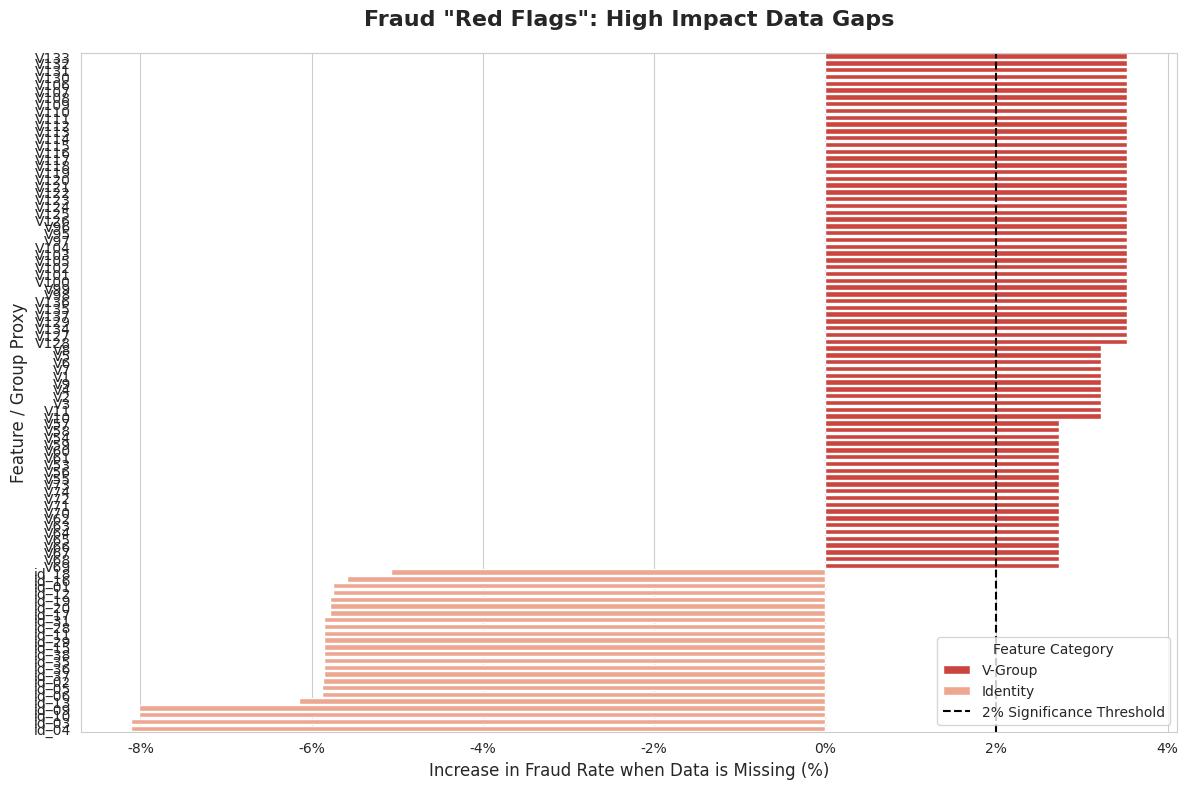

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_fraud_vulnerabilities(identity_flags, v_flags, threshold=0.02):
    # 1. Combine the results into a single DataFrame
    # identity_flags is list of (col, jump), v_flags is list of (group_name, proxy_col, jump)
    data = []
    for col, jump in vulnerable_features:
        data.append({'Feature': col, 'Fraud_Jump': jump, 'Type': 'Identity'})
    for col, jump in v_flags:
        data.append({'Feature': col, 'Fraud_Jump': jump, 'Type': 'V-Group'})

    df_plot = pd.DataFrame(data)
    if df_plot.empty:
        print("No features met the threshold.")
        return

    # 2. Sort for better visual impact
    df_plot = df_plot.sort_values(by='Fraud_Jump', ascending=False)

    # 3. Create the Horizontal Bar Chart
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # Use a 'Reds' palette to highlight danger/fraud
    ax = sns.barplot(
        x='Fraud_Jump',
        y='Feature',
        data=df_plot,
        palette="Reds_r",
        hue='Type',
        dodge=False
    )

    # 4. Add the Significance Threshold Line
    plt.axvline(x=threshold, color='black', linestyle='--', label=f'{threshold:.0%} Significance Threshold')

    # 5. Formatting
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    plt.title('Fraud "Red Flags": High Impact Data Gaps', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Increase in Fraud Rate when Data is Missing (%)', fontsize=12)
    plt.ylabel('Feature / Group Proxy', fontsize=12)
    plt.legend(title="Feature Category", loc="lower right")
    plt.savefig('images/fraud_red_flags.png', dpi=300, bbox_inches='tight')

    plt.tight_layout()
    plt.show()

plot_fraud_vulnerabilities(vulnerable_features, v_group_red_flag)

# **Feature Engineering**

**PART 1: Dimensionality Reduction: Applying PCA on missing clusters to selectively retain features**

In [101]:
#Credits: https://stackoverflow.com/questions/45240556/perform-pca-on-each-group-of-a-groupby-in-pyspark
def apply_pca_to_v_groups(df, v_groups, n_components=0.95, fitted_scalers_pcas=None):
  pca_features = pd.DataFrame(index=df.index)

  # Initialize list to store scalers and PCA models if fitting (for training)
  current_scalers_pcas = []

  for i, group_cols_list in enumerate(v_groups):
      # Filter for columns actually present in the current DataFrame
      actual_group_cols = [col for col in group_cols_list if col in df.columns]
      if not actual_group_cols:
          # If a group is entirely missing, we'll skip it for PCA generation,
          # but ensure downstream steps handle potential missing columns gracefully.
          print(f"Warning: Skipping V-Group {i} as no columns found in DataFrame.")
          continue

      subset = df[actual_group_cols].fillna(df[actual_group_cols].median())

      if fitted_scalers_pcas is None: # This is the training phase: fit new models
          scaler = StandardScaler()
          scaled_subset = scaler.fit_transform(subset)
          pca = PCA(n_components=n_components)
          components = pca.fit_transform(scaled_subset)
          # Store the fitted scaler and PCA model with its determined number of components
          current_scalers_pcas.append({'scaler': scaler, 'pca': pca, 'n_components_': pca.n_components_})
      else: # This is the testing phase: use pre-fitted models
          if i >= len(fitted_scalers_pcas) or 'pca' not in fitted_scalers_pcas[i]:
              print(f"Warning: Skipping V-Group {i} in test data due to missing corresponding fitted PCA from training.")
              continue

          scaler = fitted_scalers_pcas[i]['scaler']
          pca = fitted_scalers_pcas[i]['pca']
          scaled_subset = scaler.transform(subset)
          components = pca.transform(scaled_subset)

      # Ensure the number of components is consistent with what was learned during the training fit.
      n_components_to_use = fitted_scalers_pcas[i]['n_components_'] if fitted_scalers_pcas is not None and i < len(fitted_scalers_pcas) else pca.n_components_

      # Truncate components if the transformation yields more than the training-determined count
      if components.shape[1] > n_components_to_use:
          components = components[:, :n_components_to_use]
      # If the transformation yields fewer, pad with NaNs or zeros if necessary,
      # but generally PCA.transform should yield consistent number of columns if pca.n_components_ is fixed.
      # For this specific error, we focus on the excess column.

      col_names = [f'V_Group_{i}_PC{j}' for j in range(n_components_to_use)]
      pca_features[col_names] = components

      print(f"Group {i}: Reduced {len(actual_group_cols)} features to {n_components_to_use} components.")

  # Return fitted scalers and PCAs only during the training phase
  if fitted_scalers_pcas is None:
      return pca_features, current_scalers_pcas
  else:
      return pca_features

In [102]:
df_train_pca, fitted_scalers_pcas = apply_pca_to_v_groups(df_train, nan_groups)

Group 0: Reduced 32 features to 10 components.
Group 1: Reduced 43 features to 16 components.
Group 2: Reduced 11 features to 7 components.
Group 3: Reduced 23 features to 9 components.
Group 4: Reduced 22 features to 10 components.
Group 5: Reduced 20 features to 10 components.
Group 6: Reduced 18 features to 9 components.
Group 7: Reduced 11 features to 7 components.
Group 8: Reduced 16 features to 6 components.
Group 9: Reduced 19 features to 9 components.
Group 10: Reduced 31 features to 7 components.


/tmp/ipython-input-6382/976843097.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pca_features[col_names] = components
/tmp/ipython-input-6382/976843097.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pca_features[col_names] = components
/tmp/ipython-input-6382/976843097.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

Group 11: Reduced 46 features to 12 components.
Group 12: Reduced 18 features to 5 components.
Group 13: Reduced 11 features to 3 components.
Group 14: Reduced 18 features to 6 components.


/tmp/ipython-input-6382/976843097.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pca_features[col_names] = components
/tmp/ipython-input-6382/976843097.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pca_features[col_names] = components
/tmp/ipython-input-6382/976843097.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

In [103]:
print(df_train_pca.shape)

(354324, 126)


In [104]:
df_test_pca = apply_pca_to_v_groups(df_test, nan_groups, fitted_scalers_pcas=fitted_scalers_pcas)

Group 0: Reduced 32 features to 10 components.
Group 1: Reduced 43 features to 16 components.
Group 2: Reduced 11 features to 7 components.
Group 3: Reduced 23 features to 9 components.
Group 4: Reduced 22 features to 10 components.
Group 5: Reduced 20 features to 10 components.
Group 6: Reduced 18 features to 9 components.
Group 7: Reduced 11 features to 7 components.
Group 8: Reduced 16 features to 6 components.
Group 9: Reduced 19 features to 9 components.
Group 10: Reduced 31 features to 7 components.


/tmp/ipython-input-6382/976843097.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pca_features[col_names] = components
/tmp/ipython-input-6382/976843097.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pca_features[col_names] = components
/tmp/ipython-input-6382/976843097.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

Group 11: Reduced 46 features to 12 components.
Group 12: Reduced 18 features to 5 components.
Group 13: Reduced 11 features to 3 components.
Group 14: Reduced 18 features to 6 components.


/tmp/ipython-input-6382/976843097.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pca_features[col_names] = components
/tmp/ipython-input-6382/976843097.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pca_features[col_names] = components
/tmp/ipython-input-6382/976843097.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

In [105]:
print(df_test_pca.shape)

(236216, 126)


In [59]:
def get_pca_loadings(df, group_cols, n_components=0.95):

    # 1. Prep data (Standardize as we did for PCA)
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA

    subset = df[group_cols].fillna(df[group_cols].median())
    scaled_data = StandardScaler().fit_transform(subset)

    # 2. Fit PCA
    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)

    # 3. Create Loadings DataFrame
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i}' for i in range(pca.n_components_)],
        index=group_cols
    )

    return loadings

In [60]:
group1_loadings=get_pca_loadings(df_train, nan_groups[1])

In [61]:
print(group1_loadings)

           PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
V95   0.236089 -0.029288 -0.080428 -0.049762 -0.119592  0.000961 -0.038429   
V96   0.246532 -0.027822 -0.044335 -0.019255 -0.094935 -0.009349 -0.004460   
V97   0.246968 -0.027140 -0.048711 -0.026827 -0.073877 -0.007502  0.007047   
V98   0.038895  0.022423  0.244552  0.239038 -0.009619  0.018184  0.186291   
V99   0.123334  0.010948  0.238779  0.226602 -0.088598 -0.066530  0.159027   
V100  0.127740  0.015941  0.261724  0.249877 -0.076196 -0.044292  0.185976   
V101  0.234416 -0.030370 -0.086005 -0.053541 -0.127911  0.001481 -0.045818   
V102  0.244362 -0.030301 -0.066539 -0.037788 -0.101459 -0.003429 -0.022108   
V103  0.245518 -0.029074 -0.062376 -0.037502 -0.083279 -0.004810 -0.006249   
V104  0.197913  0.003049  0.010763 -0.023011  0.180609 -0.023670  0.120912   
V105  0.238209 -0.018357 -0.015338 -0.012465  0.019135 -0.020611  0.051772   
V106  0.226060 -0.011576  0.000260 -0.011416  0.088289 -0.022643

**Summary of dimensionality reduction**

- Addressing the high dimensionality of the 339 Vesta-engineered features by segmenting them into 15 logical clusters based on their missing data signatures
- Applied Block-wise PCA to each cluster to preserve 95% of the variance. This reduced my feature space by 62%, significantly decreasing model training time
- Dimensions reduced from 339 to 127

**Part 2: Other feature engineering**


*   Unique Identifier
*   Determine avg transaction size
*   Transaction DT transformation
*   Categorical variable transformation





In [106]:
#Training dataset
#1 Drop transaction identifier
if 'TransactionID' in df_train.columns:
    df_train=df_train.drop(columns=['TransactionID'])
#2 Create unique identifier
df_train['UID']=df_train['card1'].astype(str)+'_'+df_train['addr1'].astype(str)+'_'+df_train['P_emaildomain'].astype(str)
#3 Calculate the hour of transaction
df_train['Transaction_Hour']=df_train['TransactionDT'].apply(lambda x: int(x/3600))
#4 Compute avg transaction(order value) size
df_train['TransactionAmt_mean_card1']=df_train.groupby(['card1','addr1','P_emaildomain'])['TransactionAmt'].transform('mean')

#Test dataset
#1 Drop transaction identifier
if 'TransactionID' in df_test.columns:
    df_test=df_test.drop(columns=['TransactionID'])
#2 Create unique identifier
df_test['UID']=df_test['card1'].astype(str)+'_'+df_test['addr1'].astype(str)+'_'+df_test['P_emaildomain'].astype(str)
#3 Calculate the hour of transaction
df_test['Transaction_Hour']=df_test['TransactionDT'].apply(lambda x: int(x/3600))
#4 Compute avg transaction(order value) size
df_test['TransactionAmt_mean_card1']=df_test.groupby(['card1','addr1','P_emaildomain'])['TransactionAmt'].transform('mean')

#PCA Clean up
cols_to_remove = [item for sublist in nan_groups for item in sublist]
df_train_reduced = df_train.drop(columns=cols_to_remove, errors='ignore')
df_train_final = pd.concat([df_train_reduced, df_train_pca], axis=1)

df_test_reduced = df_test.drop(columns=cols_to_remove, errors='ignore')
df_test_final = pd.concat([df_test_reduced, df_test_pca], axis=1)

In [107]:
cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
            'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
            'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9',
            'P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3', 'R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']
for col in cat_cols:
    if col in df_train_final.columns and col in df_test_final.columns:
        le = LabelEncoder()
        le.fit(list(df_train_final[col].astype(str).values) + list(df_test_final[col].astype(str).values))
        df_train_final[col] = le.transform(list(df_train_final[col].astype(str).values))
        df_test_final[col] = le.transform(list(df_test_final[col].astype(str).values))

In [64]:
summary_stats(df_train_final)

,dtype,sample_val,vals,miss_pct,unique,mean,mode,min,max,std,skew,kurtosis
isFraud,int64,0,354324,0.0,2,0.03,0.00,0.00,1.00,0.18,NaN,NaN
TransactionDT,int64,2068756,354324,0.0,348064,7371523.09,4397066.00,86400.00,15811131.00,4616236.89,NaN,NaN
TransactionAmt,float64,59.0,354324,0.0,15914,134.62,59.00,0.25,31937.39,236.07,NaN,NaN
ProductCD,int64,4,354324,0.0,5,3.22,4.00,0.00,4.00,1.43,NaN,NaN
card1,int64,8688,354324,0.0,11830,11447.40,19616.00,1.00,22292.00,6548.81,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
V_Group_14_PC1,float64,2.519048,354324,0.0,1740,-0.00,-0.22,-38.83,222.80,2.04,NaN,NaN
V_Group_14_PC2,float64,-0.215975,354324,0.0,1740,-0.00,-0.22,-60.62,79.94,1.43,NaN,NaN
V_Group_14_PC3,float64,-0.021052,354324,0.0,1740,-0.00,-0.02,-124.58,56.93,1.03,NaN,NaN
V_Group_14_PC4,float64,0.026468,354324,0.0,1739,0.00,0.03,-38.66,111.12,0.85,NaN,NaN


# **Baseline Model**

In [108]:
x_train=df_train_final.drop(columns=['isFraud', 'UID'])
y_train=df_train_final['isFraud']

In [109]:
x_test=df_test_final.drop(columns=['isFraud', 'UID'])
y_test=df_test_final['isFraud']

In [110]:
dt_baseline = DecisionTreeClassifier(
    max_depth=5,
    class_weight='balanced',
    random_state=42
)
dt_baseline.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

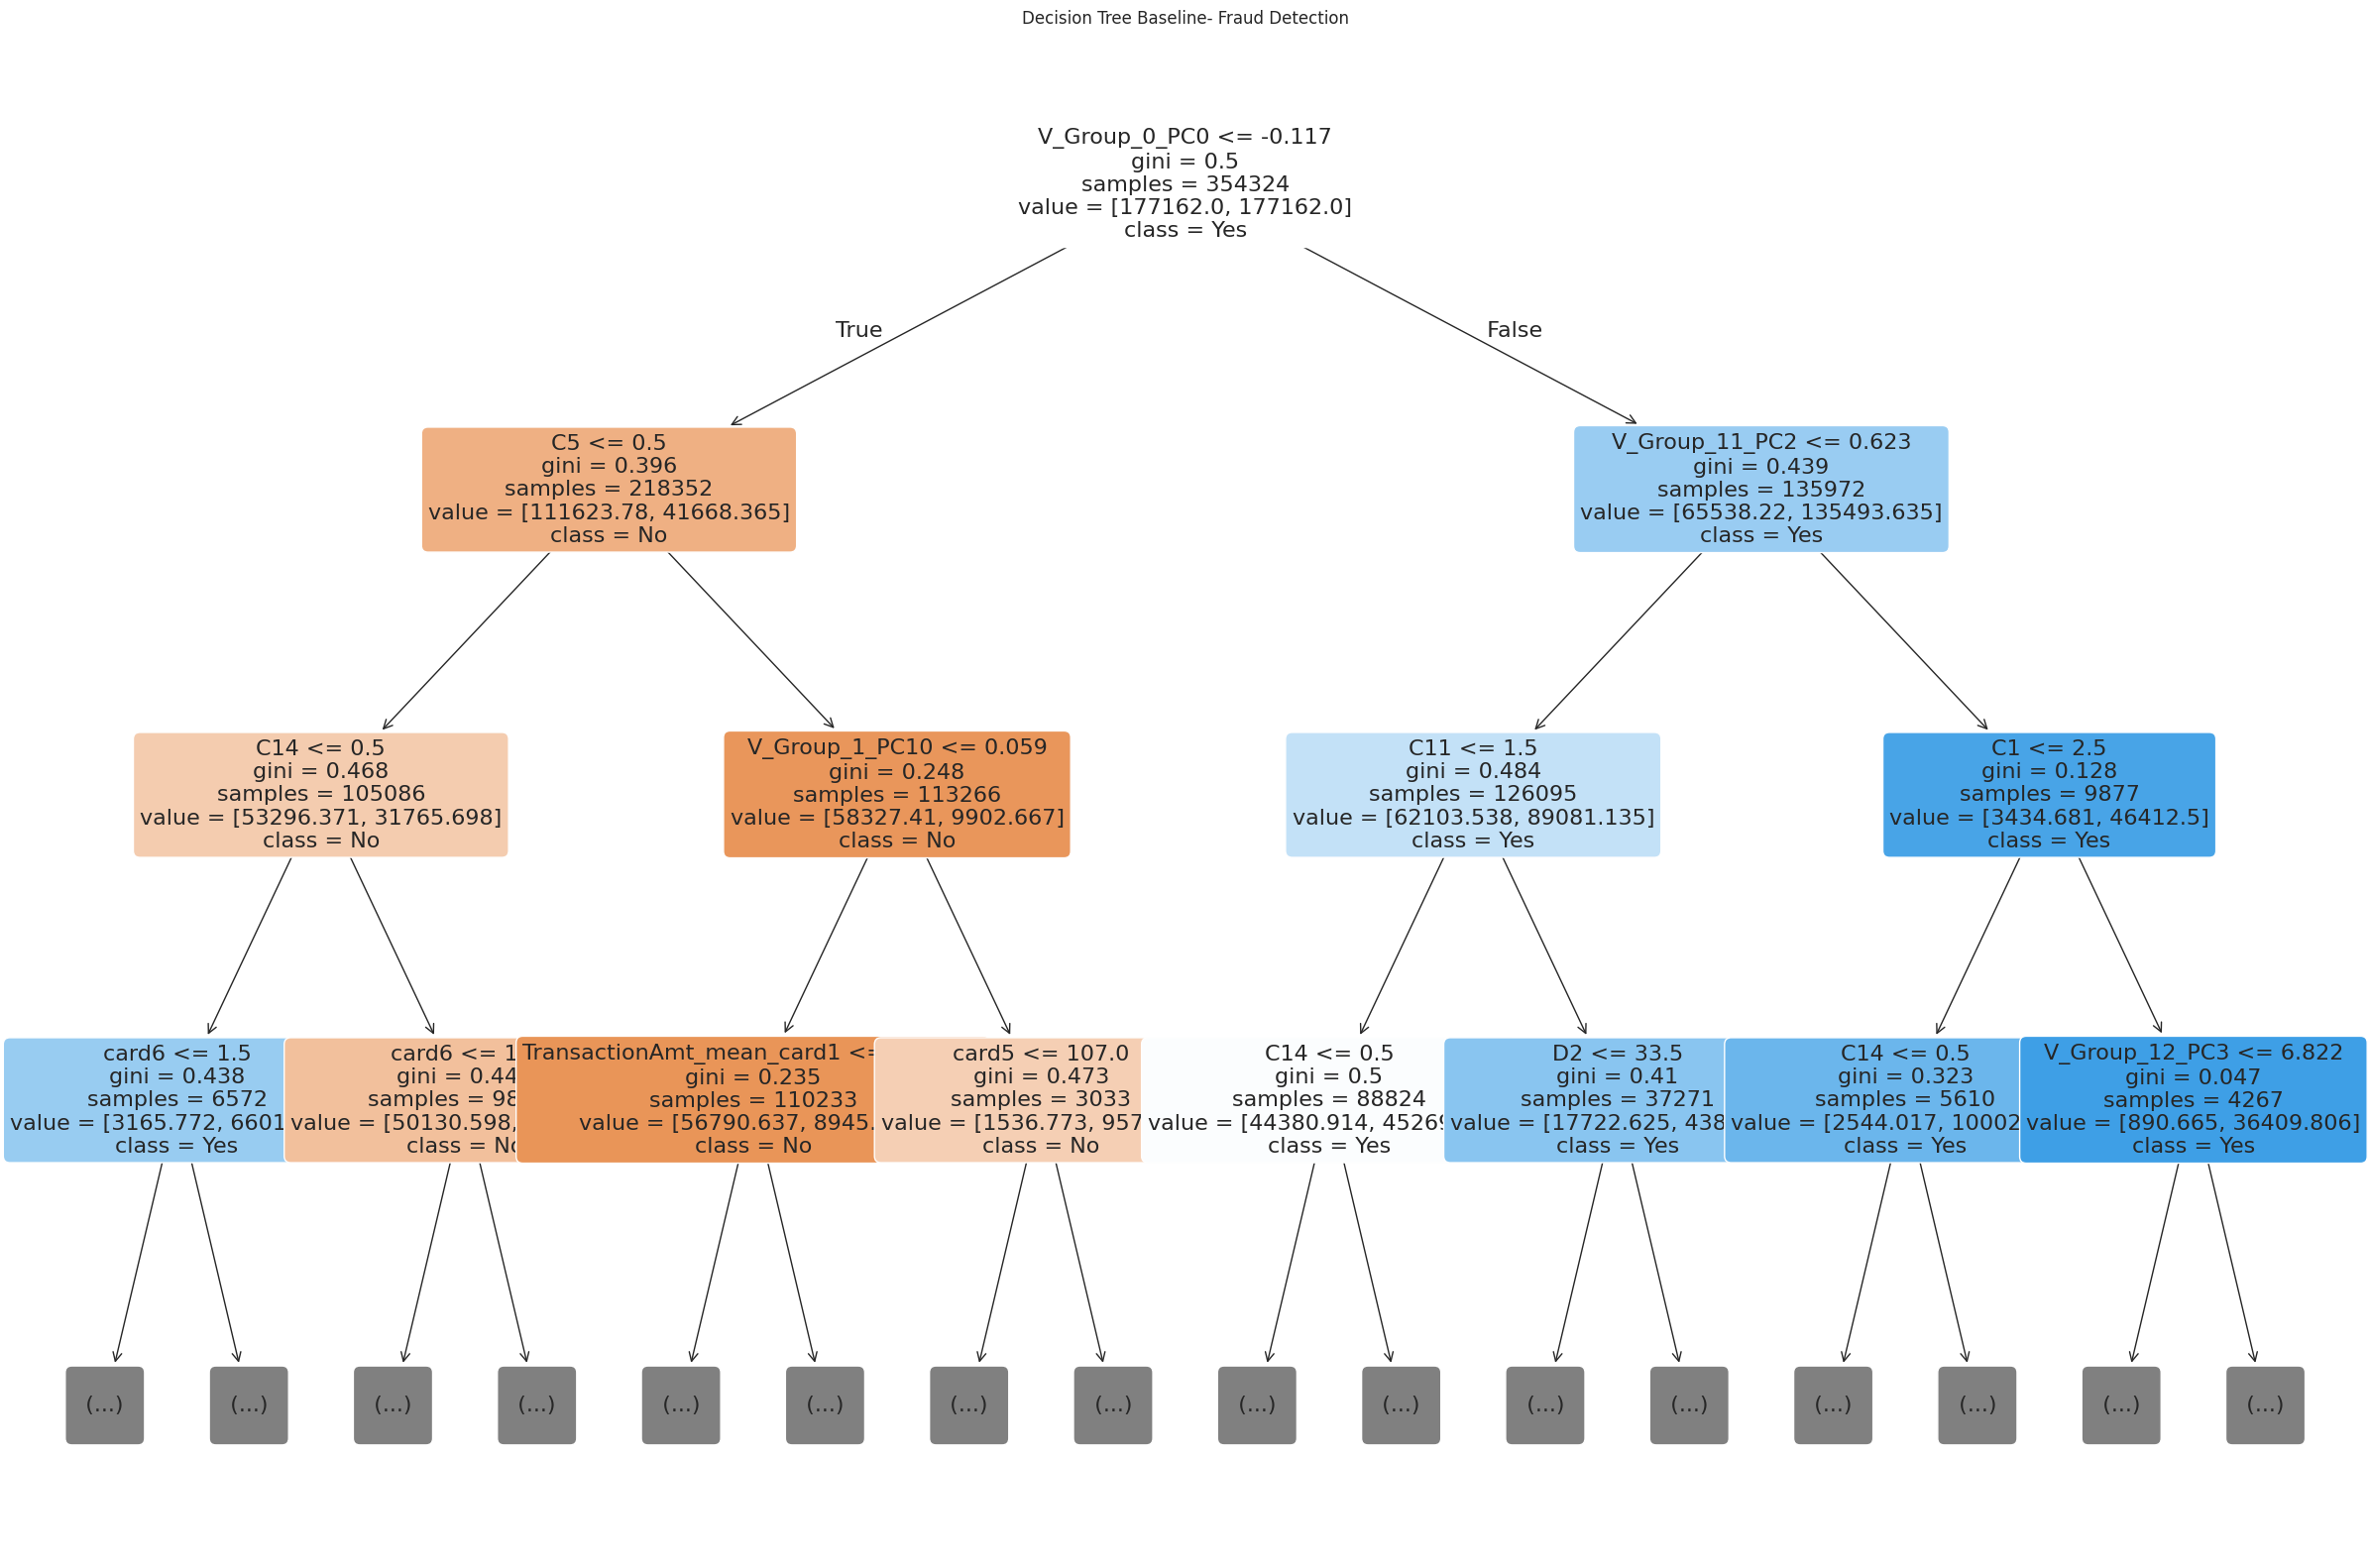

In [113]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Increase figsize for better clarity
plt.figure(figsize=(30, 20))

plot_tree(
    dt_baseline,
    feature_names=x_train.columns,
    class_names=['No', 'Yes'],
    filled=True,          # Colors nodes by majority class
    rounded=True,         # Rounded boxes
    fontsize=16,
    max_depth=3
)

plt.title("Decision Tree Baseline- Fraud Detection")
plt.savefig('images/Decision_Tree_Baseline.png', dpi=300, bbox_inches='tight')
plt.show()

--- Decision Tree Generalization Check ---
Train Average Precision: 0.279
Test Average Precision:  0.271
Difference (Gap):        0.008

--- Detailed Test Metrics (Decision Tree) ---
              precision    recall  f1-score   support

           0       0.99      0.83      0.90    227951
           1       0.13      0.71      0.22      8265

    accuracy                           0.83    236216
   macro avg       0.56      0.77      0.56    236216
weighted avg       0.96      0.83      0.88    236216



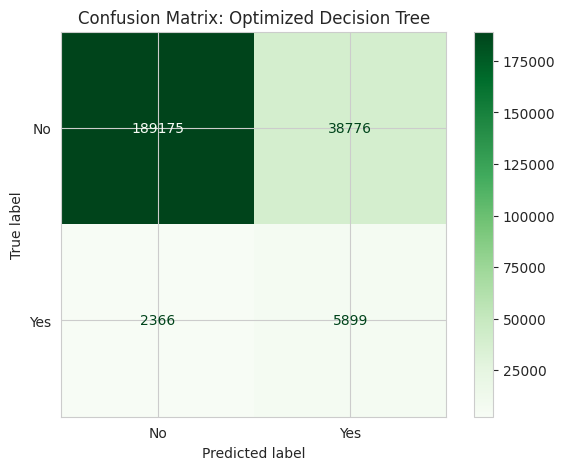

In [111]:
# Get probability scores
train_probs_dt = dt_baseline.predict_proba(x_train)[:, 1]
test_probs_dt = dt_baseline.predict_proba(x_test)[:, 1]

# Calculate Average Precision
ap_train_dt = average_precision_score(y_train, train_probs_dt)
ap_test_dt = average_precision_score(y_test, test_probs_dt)

print(f"--- Decision Tree Generalization Check ---")
print(f"Train Average Precision: {ap_train_dt:.3f}")
print(f"Test Average Precision:  {ap_test_dt:.3f}")
print(f"Difference (Gap):        {ap_train_dt - ap_test_dt:.3f}")

# Detailed Metrics
dt_test_preds = dt_baseline.predict(x_test)
print("\n--- Detailed Test Metrics (Decision Tree) ---")
print(classification_report(y_test, dt_test_preds))

#Confusion Matrix
fig, ax = plt.subplots(figsize=(7, 5))
ConfusionMatrixDisplay.from_estimator(
    dt_baseline,
    x_test,
    y_test,
    display_labels=["No", "Yes"],
    cmap='Greens',
    ax=ax
)
plt.title("Confusion Matrix: Optimized Decision Tree")
plt.show()

# **Initial Readout**

**Interpreting Features**
*   Missing data signaling fraud in vindicated: Principal Component from Vest Group 1 with missing data is the most powerful indicator of the model
*   Principal component within Group 11 with missing data and C1 leads to fraud classification with high purity
*   Mean transaction spend on cards is a significant feature in distinguishing fraud transactions from non-fraud


**Baseline model selection and Evaluation**

*   Baseline model used is a single decision tree; Logistic regression/SVM was not applied due to high cardinality of categorical variables: Device/Browser etc.

*   Model output is stable demonstrated by variance of 0.008 between Train and Test demonstrating ability to pick signals rather than memorizing training data

*   Precision of 0.13 (13%) suggests model is 360 times better at determining Fraud than baseline fraud rate on data (3.6%)

*   Recall rate of 0.71 means 71% of fraud is captured



# **Next Steps**
*    Opportunity to improve on False Positive rate
*    Apply XGBoost and other Ensemble methods to use Diverse trees to improve precision
